# Buisness Case : predicting the employee performance based on the given feature.

## Importing the necessary library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the Data

In [2]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df.head()  # Using this we get first 5 rows

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## Domain Analysis

#### Understanding the context of the feature that we are working on 

##### 1. EmpNumber:
EMPnumber typically refers to an Employee Identification Number, it is a unique identifier assigned to an each individual employee within an organization.

##### 2.Age:
Age of an employee in years

##### 3.Gender:
Gender of an employee (Male or Female)

##### 4.EducationBackground:
This will be a high school diploma or a post-secondary degree of a employee

##### 5.MaritalStatus: 
it refers to the current state of employee being married, single or divorced.

##### 6.EmpDepartment:
it refers to the department in which an employee works within an comapany.

##### 7. EmpJobRole:
it refers to the specific position or responsibilities assigned to that employee.

##### 8. BuisnessTravelFrequency:
it refers to the number of times an individual or an employee travles for an buisness purposes.

##### 9. DistanceFromHome:
the distance from the employee's home to the company.

##### 10.EmpEducationLevel:
it refers to highest level of education qualify by an employee. like, high school diploma, bachelor's degree or master's degree or PhD.

##### 11. EmpEnvironmentStatisfaction:
it refers to the contentment, comfort, and fullfillment that employee's experience in thier work environment.

##### 12.EmpHourlyRate:
it means, the amount paid to an employee for each hour worked.

##### 13. EmpJobInvolvement:
it refers to the extent to which employees are emotionally invested, engaged, and committed to thier work.

##### 14.EmpJobLevel:
it indicates the level of reponsibility, authority, and seniority associated with a particular role.

##### 15. EmpJobSatisfaction:
it means, the level of contentment, and positive feelings that employee's experience in raltion to their job.

##### 16.NumCompaniesWorked:
the count of different companies, that an employee has been worked for.

##### 17. OverTime:
means, the hours that an employee works beyond their regular working hours.

##### 18. EmpLastSalaryHikePercent:
the percentage increase in an employee's salary compared to their current salary.

##### 19. EmpRelationshipSatisfaction:
if refers to the contentment,positive interaction that employee experience in their raltionships within the workplace.

##### 20.TotalWorkExperienceInYears:
total work experience of an employee in years.

##### 21.TrainingTimeLastYear:
the total number of trainings done by an employee in last year.

##### 22.EmpWorkLifeBalance:
it refers to the equality an employee's maintains between their professional responsibilities and personal life.

##### 23. ExperienceYearsAtThisCompany:
total number of working experience in current company.

##### 24. ExperienceYearsInCurrentRole:
total number of experience of an employee in current job role.

##### 25.YearsSinceLastPromotion:
it means, the amount of time that has passed since an employee received their recent promotion.

##### 26.YearsWithCurrManager:
Employee's total number of years working with current manager. 

##### 27.Attrition:
Employee attrition is the naturally occurring, voluntary departure of employees from a company. Employee attrition involves leaving a job for: Personal reasons. Professional motivation.

##### 28.PerformanceRating:
This is a target feature, tell that the total rating of employee performance in company.

In [3]:
pd.set_option('display.max_columns', None) # Used to display all columns present in the data
df.head()  # This will display the first 5 observations

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [4]:
df.tail()  # it will display the last 5 observations

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [5]:
df.shape      # will display the number of observations(rows) and features(columns) in the dataset
print(f'There are total {df.shape[0]} rows and {df.shape[1]} columns in our dataset')

There are total 1200 rows and 28 columns in our dataset


In [6]:
df.info()  # shows the names and data type of columns and also shows the number of rows and columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

### Observation:
* There are total 28 columns,from which 9 are categorical columns and remaining 19 are numerical columns

In [7]:
df.duplicated().sum()  # checking duplicate values

0

* There is no duplicate value in our data

In [8]:
df.isnull().sum()  # checking missing values in the dataset

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

* There are no missing values in the data


In [9]:
df.drop(columns=['EmpNumber'], inplace = True) # Dropping Unwanted column 


* In our dataset,the column EmpNumber have only Employee ID values, assuming they don’t have any predictive power to predict the dependent variable.

In [10]:
for i in df.columns:    # cheking unique values of categorical features 
    if df[i].dtype == 'O':
        print(f'{i} : {df[i].unique()}')
        print('=================================================================================')

Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime : ['No' 'Yes']
Attrition : ['No' 'Yes']


# Exploratory Data Analysis

In [11]:
df.describe().T   # Statistic summary of numerical features

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


### Observations:
* Employees minimum age is 18 year and maximum age is 60 year. Average age of employees is 36 year. 50% of employees age is below 36 and 50% employees age is above 36
* Employees Average hourly rate 65.98Rs, but Some employees get 100Rs for each hour worked.
* Employees have minimum 6 years of total experience and some employees have max 40 years of total experience.
* Employees average experience in current role is 4 year, but there are some employees who have 18 years of experience in their current role.
* There are 50% employees has passed 1 year since they got promotion, also there are employees has passed 15 years since they got promotion.
* Some employees have been working with their current manager for 17 years.

In [12]:
df.describe(include='O')   # statistic summary of categorical columns

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200
unique,2,6,3,6,19,3,2,2
top,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,725,492,548,373,270,846,847,1022


### Observations:
* In company male employees are more then the female employees.
* Most of the employees education bacground is Life Science.
* There are more married employees.
* There are 19 different types of job roles in the company.
* 846 employees travel rarely for business purpose.

## Univariate Analysis

### Univariate Analysis of Continous Features

In [13]:
df.columns  # use to get all columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

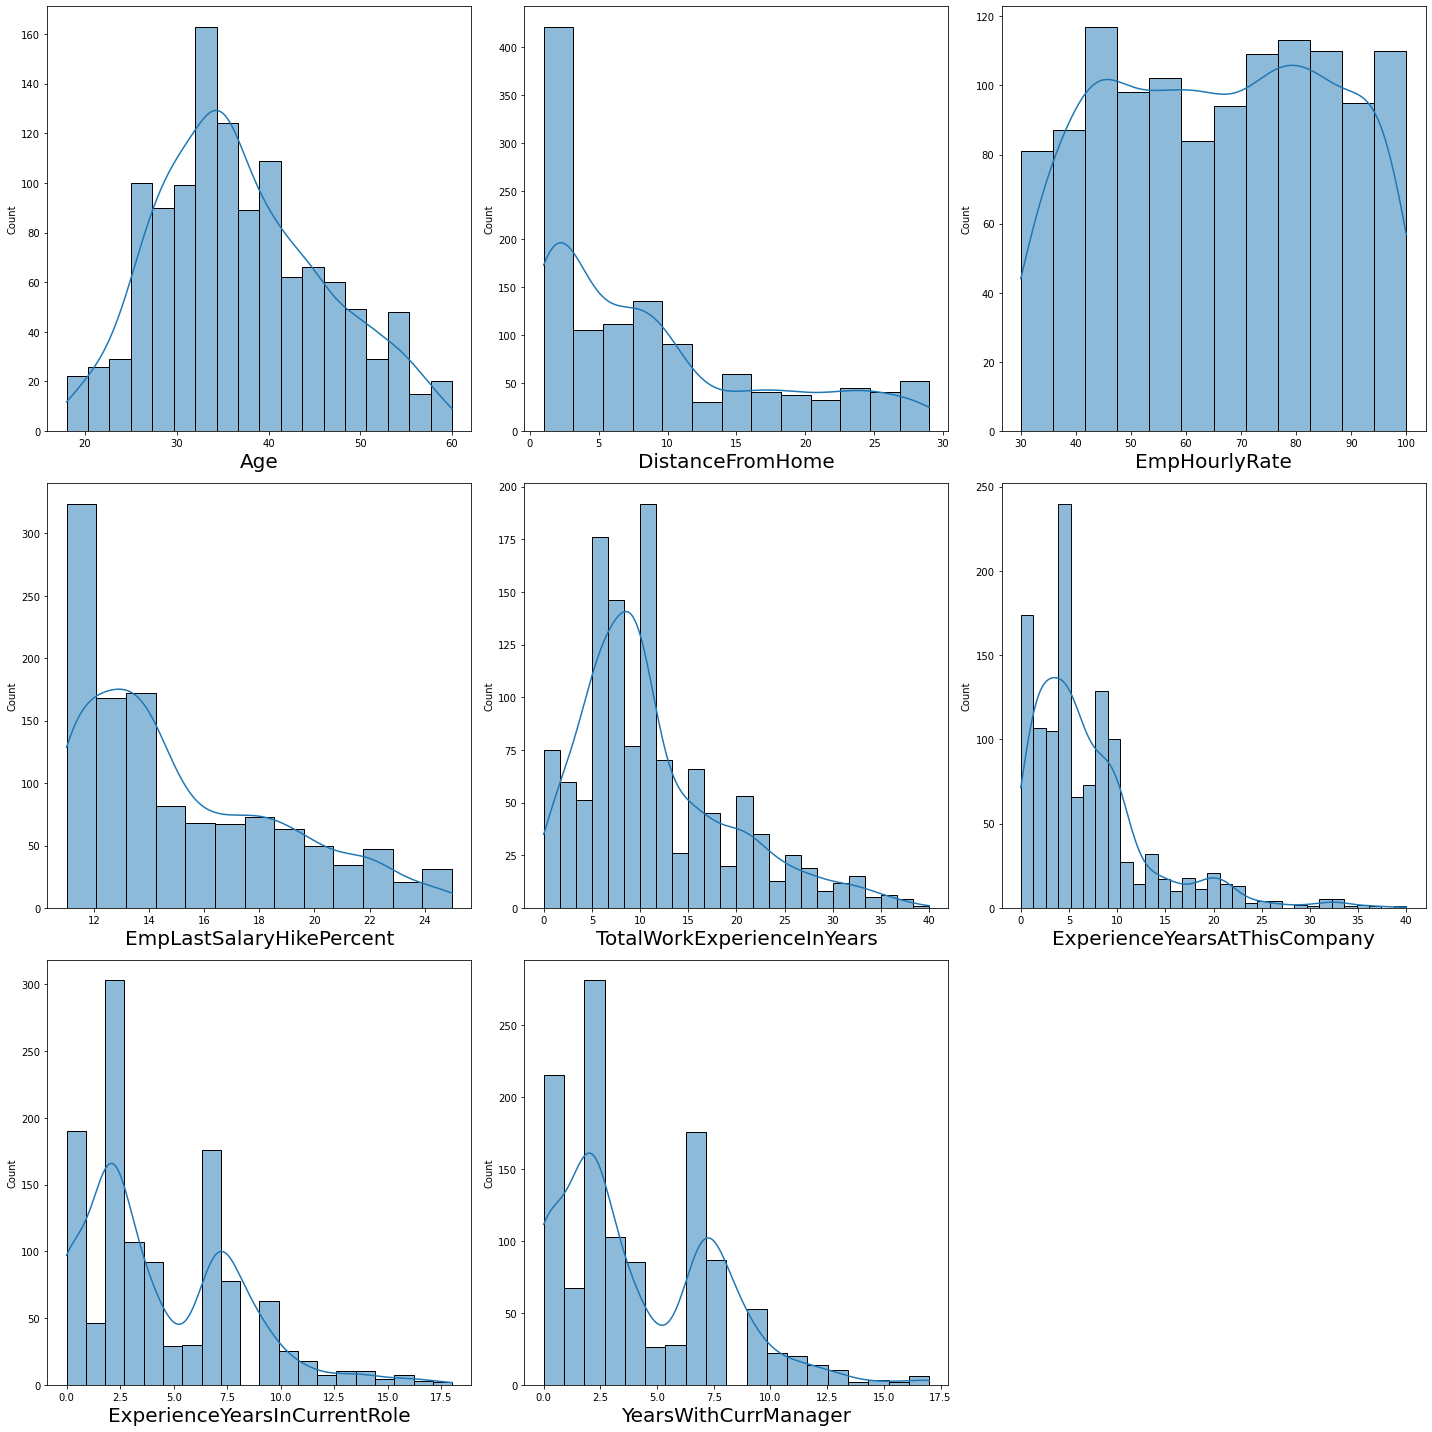

In [14]:
columns = df[[ 'Age','DistanceFromHome','EmpHourlyRate', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 
              'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 'YearsWithCurrManager']]

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in columns:
    if plotnumber <= 36:
        ax = plt.subplot(3,3, plotnumber)
        sns.histplot(x = column, kde = True, data = columns)
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Observation

##### 1. Age: 
* Age is ranges between 18 to 60 years.
* Most of the employee's age is between 25 to 40.

##### 2. Distance From Home:
* The distance of employee's form his home to comapny is between 1 to 28. 
* Most of the employee's distance form home to comapny is between 1 to 10.(means most of the employee's live near the comapany)
* There are very few employee's whose distance from their home to the comapny is long.

##### 3.Employee Hourly Rate:
* The amount an employee gets paid for each hour worked is between 30 to 100.
* Most of the employee's hourly rate is 45.

##### 4.Employee Last Salary Hike Percent:
* Salary hike ranges in 11% to 25%.
* Most of the employee's hike percentage is between 11% to 14%.(means the salary of most employee's has only increased by 11% to 14% comapared to their recent salary) 
* Less than 40 employee's means that very few employee's hike percentage is 24%.

##### 5.Total Work Experience in Years:
* Employee's total work experience ranges between 0 to 40 years.
* Maximum employee's have 5 to 12 years of work experience and have few employee's who have more work experience.
* means the employee with more experience will also be older, so thats why they are few employee's whose experience is more

##### 6. Experience Years At This Company:
* The employees experience in the current company ranges from 0 to 40 years.
* Most employees experience in the current company ranging from 0 to 10 years, but there are a significant number of employees with 5 year of experience.

##### 7.Experience Years In Current Role:
* Most employee's have 2.5 years of experience in their current job role.
* Maximum experience in current job role is 18 years.

##### 8. Years With Current Manager:
* Most of the employees working with their current manager for 2 years and only few employees who working with their current manager for 16 years.


### Univariate Analysis of Categorical and Discrete Feature

In [15]:
df.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

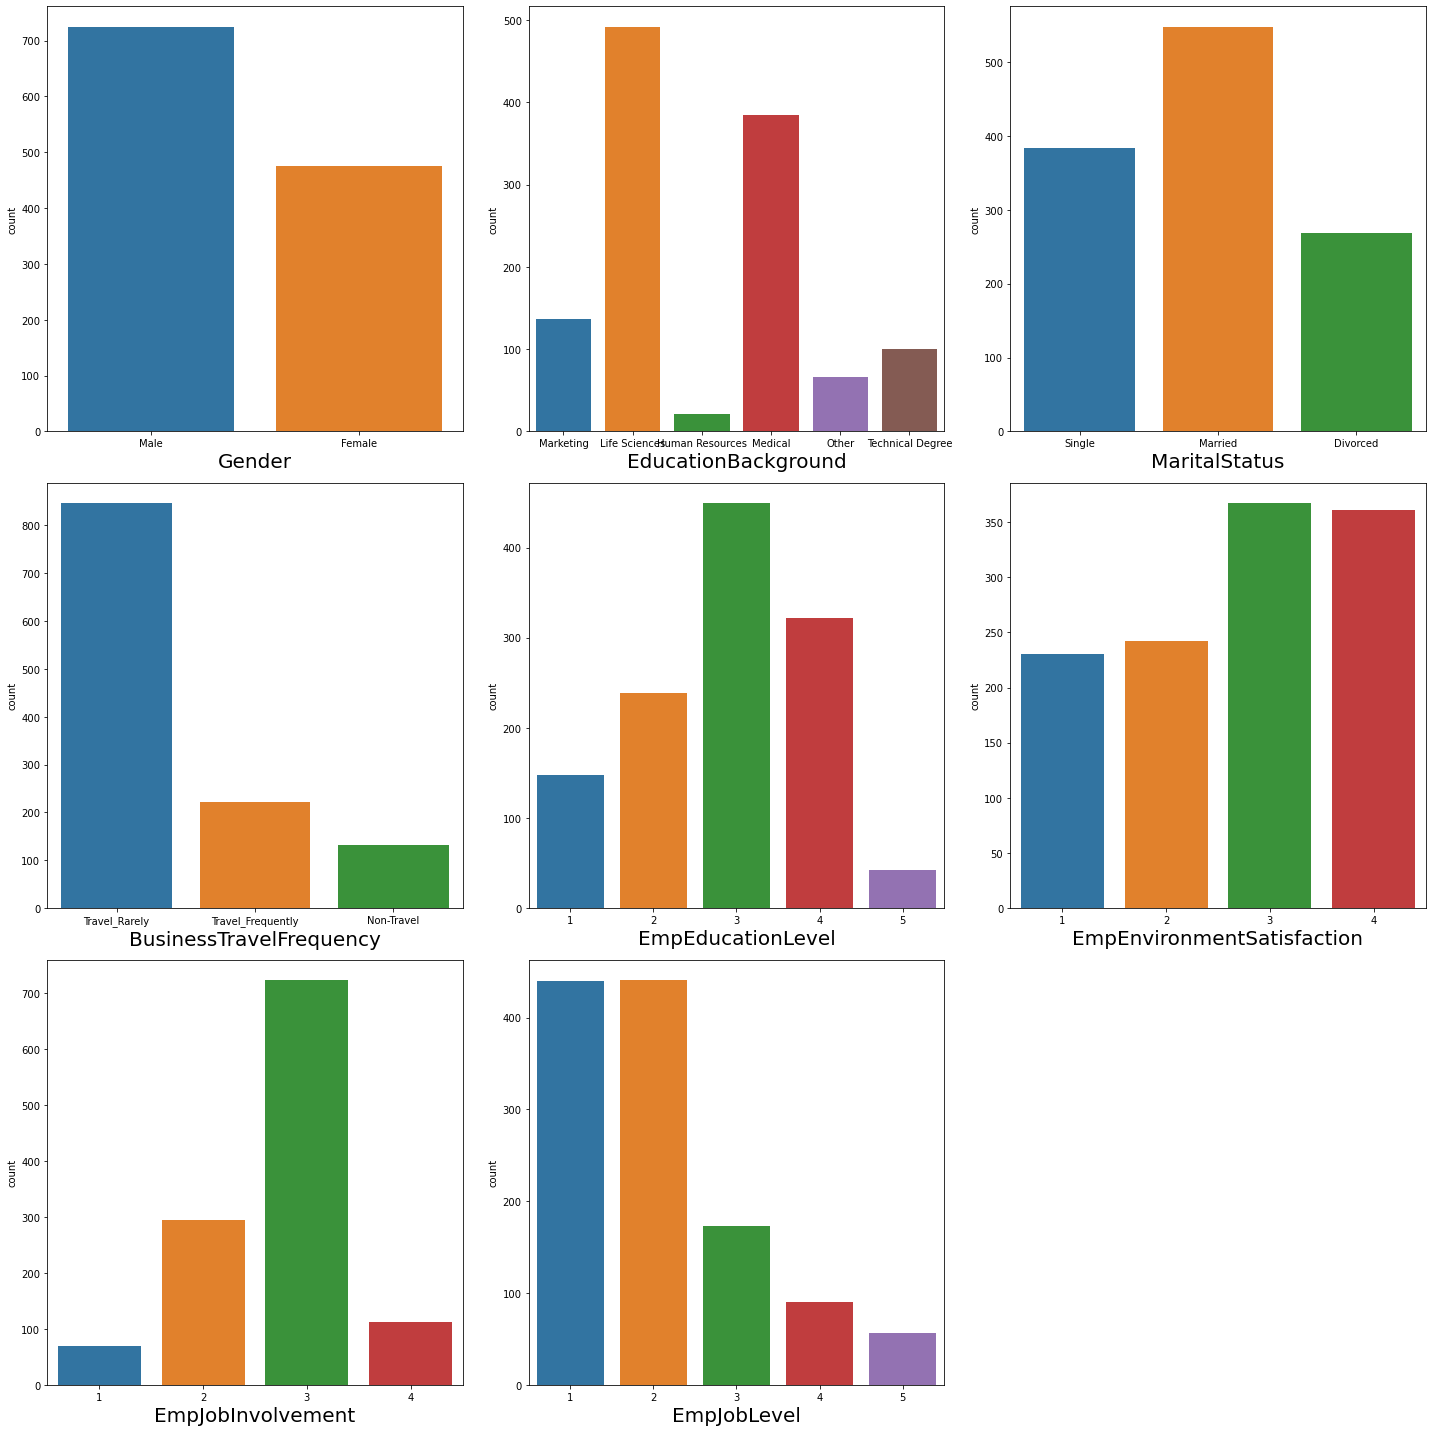

In [16]:
columns = df[['Gender', 'EducationBackground', 'MaritalStatus','BusinessTravelFrequency',
       'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel']]

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in columns:
    if plotnumber <= 36:
        ax = plt.subplot(3,3, plotnumber)
        sns.countplot(x = column, data = columns)
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Observation

##### 9.Gender:
* There are More male employees in the company comapred to female employees.

##### 10.Education Background:
* Most of the employees have a Life Science and Medical education background and around 120 employees have education background in Marketing and Technical Degree.
* Remaining Employees have other education background.

##### 11. Marital Status:
* There are more single employees, but there are even more married employees in the company.
* Less than 300 employees have marital status of divorced.

##### 12.Buisness Travel Freqency:
* Maximum number of employees travel rarely for the business purpose but more than 200 employees travel frequently for the buisness purpose.
* Less than 150 employees never travel for the buisness purpose.

##### 13. Employee Education Level:
* Employee education level is ranges between 1 to 5.
* Maximum employees education level is 3 and then 4, near 250 employees education level is 2  and less than 200 employees education level is 1.
* very few like less than 50 employees education level is 5.

##### 14.Employee Environment Satisfaction:
* Most of the employees environment satisfaction level is 3 and 4.
* Less than 250 employees have a satisfaction level of 1 and 2 ragarding the environment.

##### 15.Employee Job Involvement:
* Maximum number of employess job envolvement is 3 and more than 250 employees job involvement is 2.
* less than 120 employees job involvement is 4 and 1.

##### 16. Employee Job Level:
* Employees job level scale from 1 to 5.
* Majority of the employees are in lower job levels (1 and 2). more than 150 empployees job level is 3.
* Very few number of employees have job levels 4 and 5.

In [17]:
# remaining categorical columns

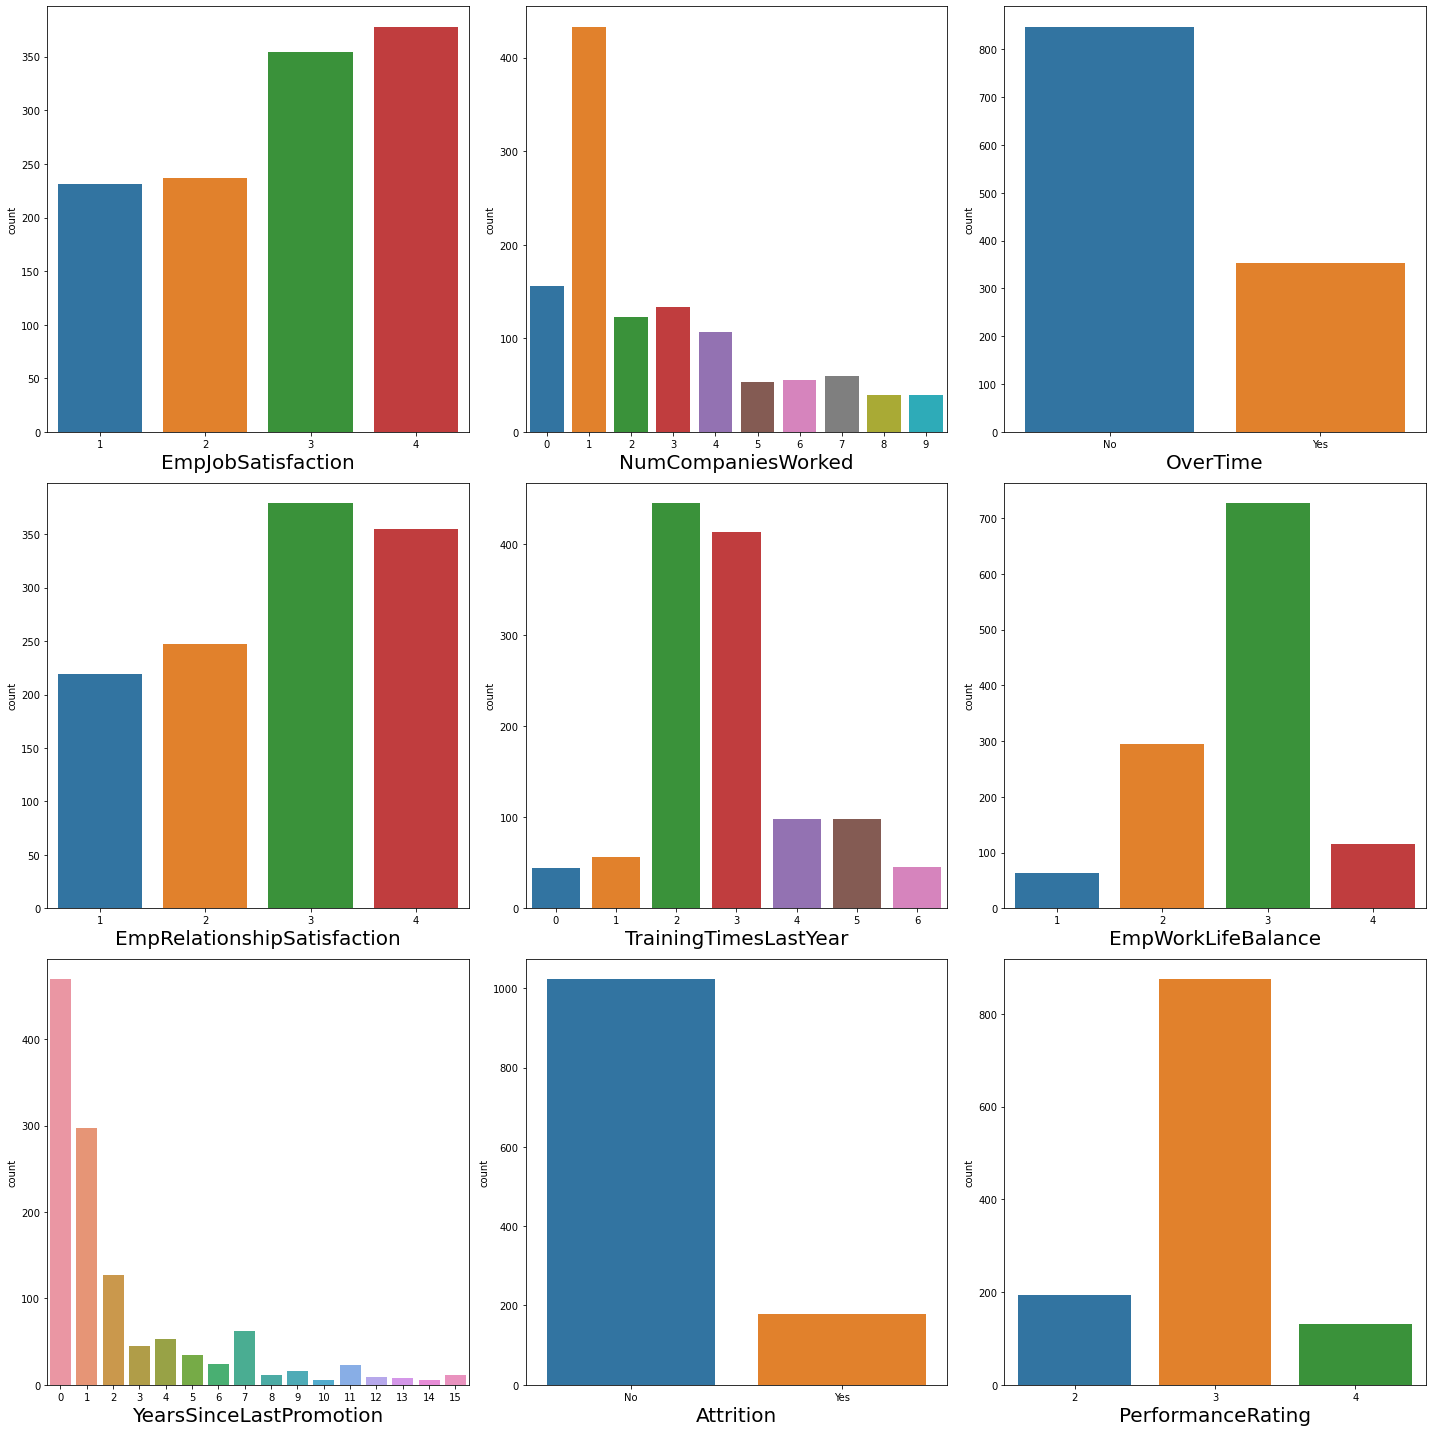

In [18]:
columns = df[['EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime','EmpRelationshipSatisfaction','TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'YearsSinceLastPromotion', 'Attrition', 'PerformanceRating']]

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in columns:
    if plotnumber <= 36:
        ax = plt.subplot(3,3, plotnumber)
        sns.countplot(x = column, data = columns)
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Observations:

##### 17.  Employee Job Satisfaction:
* Most employees job satisfaction is 3 and 4 (means most of the employees satisfy with their job).
* But less than 250 employees job satisfaction score is 1 and 2.

##### 18. Number Companies Worked:
* Most of the employees worked with only 1 company. More than 100 employees worked with 2 to 4 comapnies.
* less than 80 employees worked with more than 5 comapnies.

##### 19. Over Time:
* More than 800 employess do not work overtime.
* Around 350 employees work overtime.

##### 20. Employee Relationship Satisfaction:
* Most of the employees relationship satisfaction is 3 and 4, and less than 250 employees relationshi.p satisfaction is 1 and 2.

##### 21. Training Time Last Year:
* Training time ranges from 1 to 6. most of the employees done 2 to 3 trainings last year.
* less than 100 employees done 0,1,4,5,6 trianings last year.

##### 22. Employee Work life Balance:
* Majority of the employees work life balance level is 3, around 300 employees work life balance level is 2.
* less than 100 employees, work life balance level is 4.(means less no of employees maintain balance between work and personal life).

##### 23.Year Since Last Promotion:
* year since last promotion ranges from 1 to 15
* less than 300 employees has promoted atleast 1 year, and remaining all employees has not promoted for more than 2 years.
* some employees has not promoted since 15 years.

##### 24. Attrition:
* Maximum number of employees are not gonna leave the company.
* Less than 200 employees are going to leave the compant.

##### 25 Performance Rating:
* Performance rating is a target feature.
* Rating is ranges from 2 to 4, most of the employees performance rating is 3.
* Very few employees have 4 performance rating, and around 200 employees have 2 performance rating.


##### 26. Employee Job Role

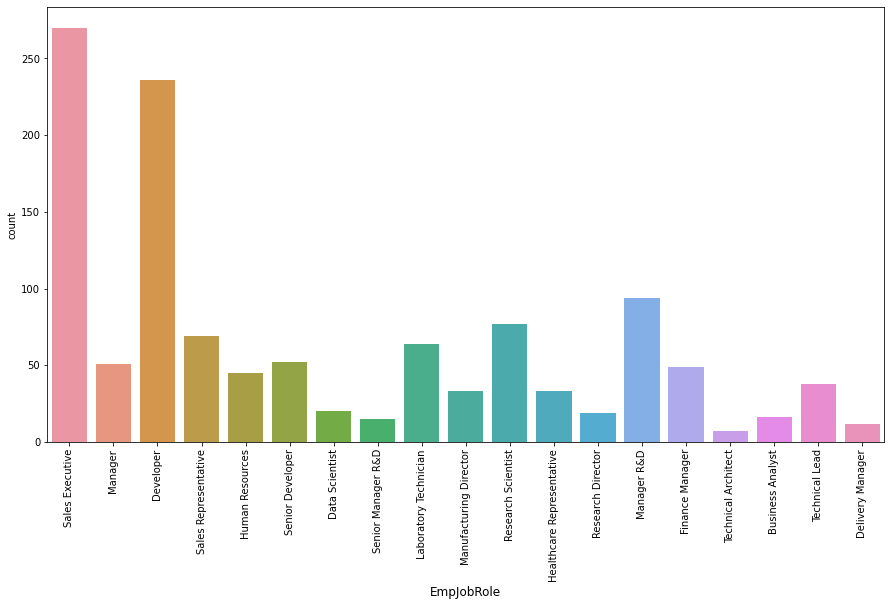

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['EmpJobRole'])
plt.xticks(rotation='vertical',fontsize=10 )
plt.xlabel('EmpJobRole', fontsize=12)
plt.show()

## Observation:
* The majority of employees job role is sales executives and developers.
* Less than 100 employees job role is Manager R&D and Research scientist, and other job roles employees are less than 65.


##### 27. Employee Department:

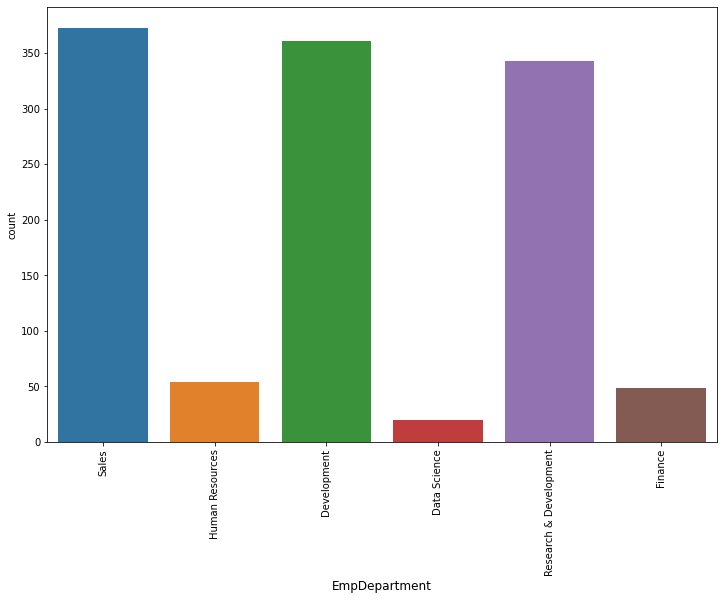

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['EmpDepartment'])
plt.xticks(rotation='vertical',fontsize=10 )
plt.xlabel('EmpDepartment', fontsize=12)
plt.show()

### Observation:
* Most of the employees work in sales , Devlopment, Research & Development department.
* around 50 employees work in Human Resources and Finance department.
* very few employees work in Data Science department.

# Bivariate Analysis

### Bivariate Analysis of Categorical Features

In [21]:
# seperating categorical column
categorical_column = []

for col in df.columns:
     if (df[col].dtype == 'O'):
            categorical_column.append(col)
print(categorical_column)

['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


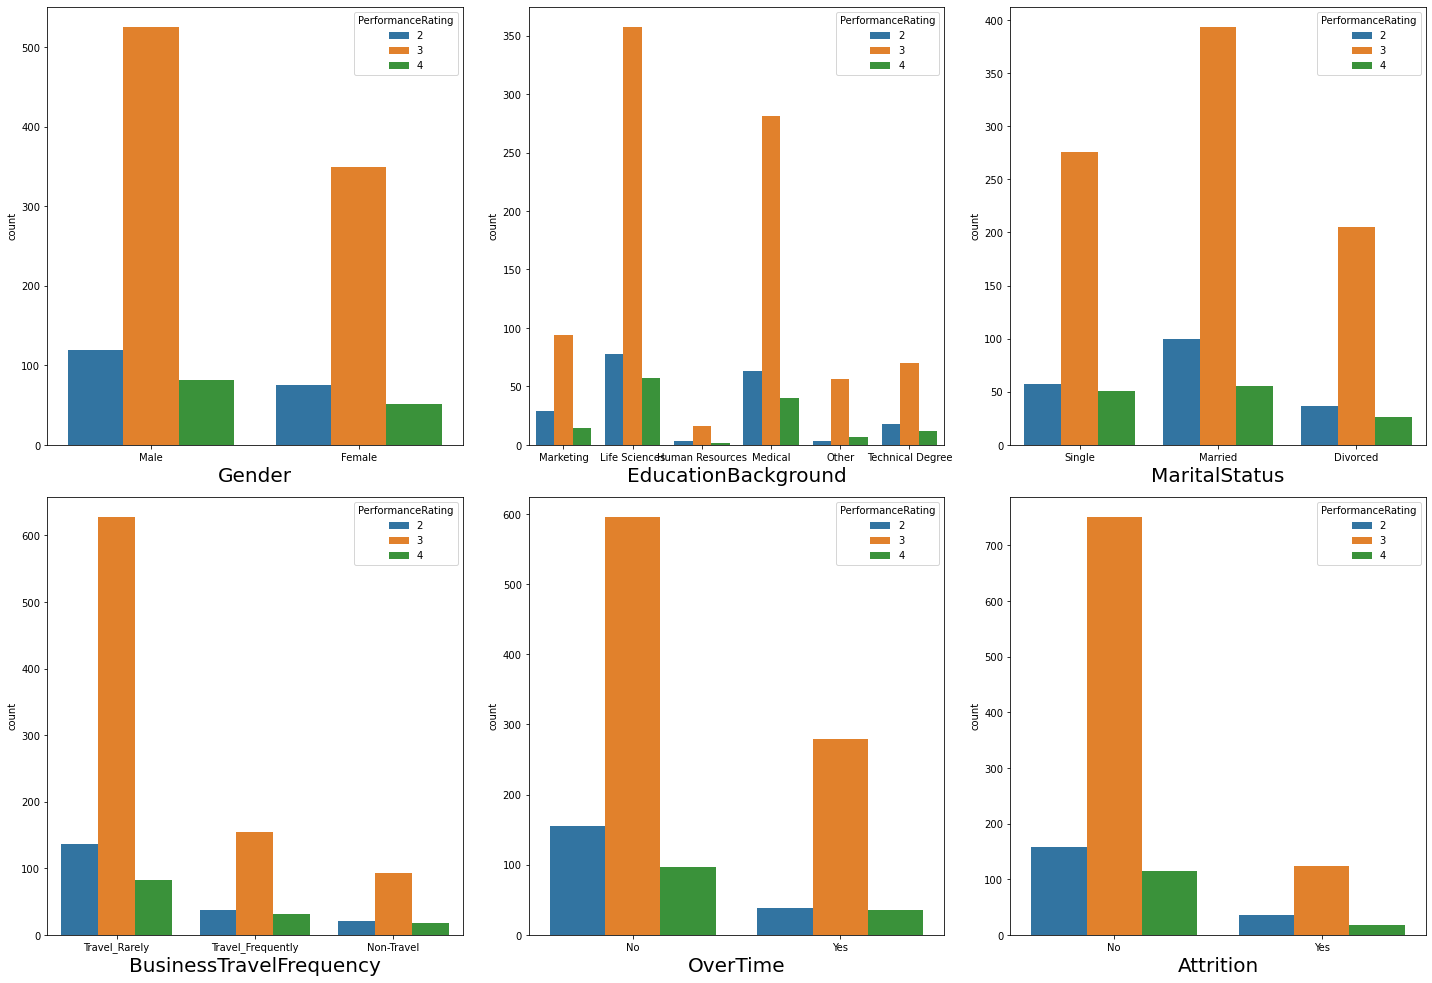

In [22]:
categorical_col = df[['Gender', 'EducationBackground', 'MaritalStatus', 
                    'BusinessTravelFrequency', 'OverTime', 'Attrition']]

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in categorical_col:
    if plotnumber <= 36:
        ax = plt.subplot(3,3, plotnumber)
        sns.countplot(x = categorical_col[column] ,hue=df['PerformanceRating'])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Observations:

##### 1. Relation between Gender and Performance Rating
* Most of the male employees performance rating is 3 and also maximum female employees performance rating is 3.
* 4 performance rating is very less in both male and female.

##### 2. Relation between Education background and Performance Rating
* maximum employees with an education background in Life science and Medical have 3 performace rating.

##### 3. Relation between Marital status and Performace Rating
* Married employees performance rating is more comapre to single and divorced employees.
* most of the married employees performance rating is 3, also most of the single and divorced employees, rated with 3 performance rating.
* Compare to married and divorced employees, single employees have more 4 performance rating.

##### 4. Relation between Buisness travel frequency and Peformance Rating
* most of the employees who travel rarely has get 3 performance rating.
* employee who travel frequently for buisness purpose have same performance rating of 2 and 4, same with non travel employees.

##### 5. Relation between Overtime and Performance Rating
* Most Employees who not doing overtime have performance rating of 3.
* Employees who doing overtime, most of them have 3 performance rating, and performance rating of 2 and 4 is constant in them.

##### 6. Relation between Attrition and Performance Rating
* Maximum Employees who do not leave the company has 3 performance rating.
* Employees who gonna leave the company ,most of them have 3 performance rating and very few employees have 4 rating.

###### 7. Relation between Employee job role and Performance Rating

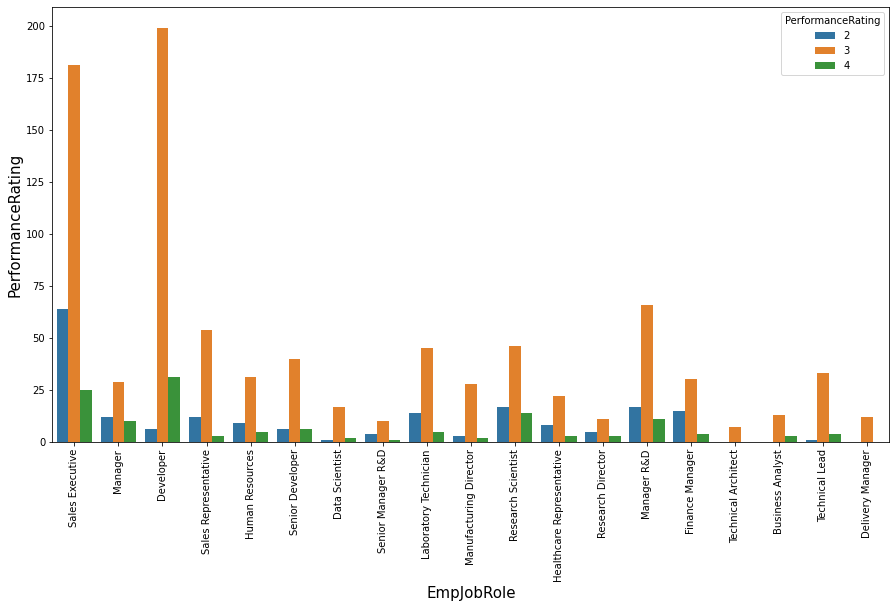

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(x= df['EmpJobRole'], hue=df['PerformanceRating'])
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=15)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

### Observation:
* Most of the Developer and sales Executive job role employee has 3 performance rating.
* also, most of  the Sales Executive job role employees has 2 performance rating.
* Technical Architect's and Delivery Manager's job role employees have only 3 performance rating. 
* Business Analyst job role employees are only rated with 3 and 4 performance rating, they dont have 2 performance rating.

### Bivariate Analysis of Numerical features


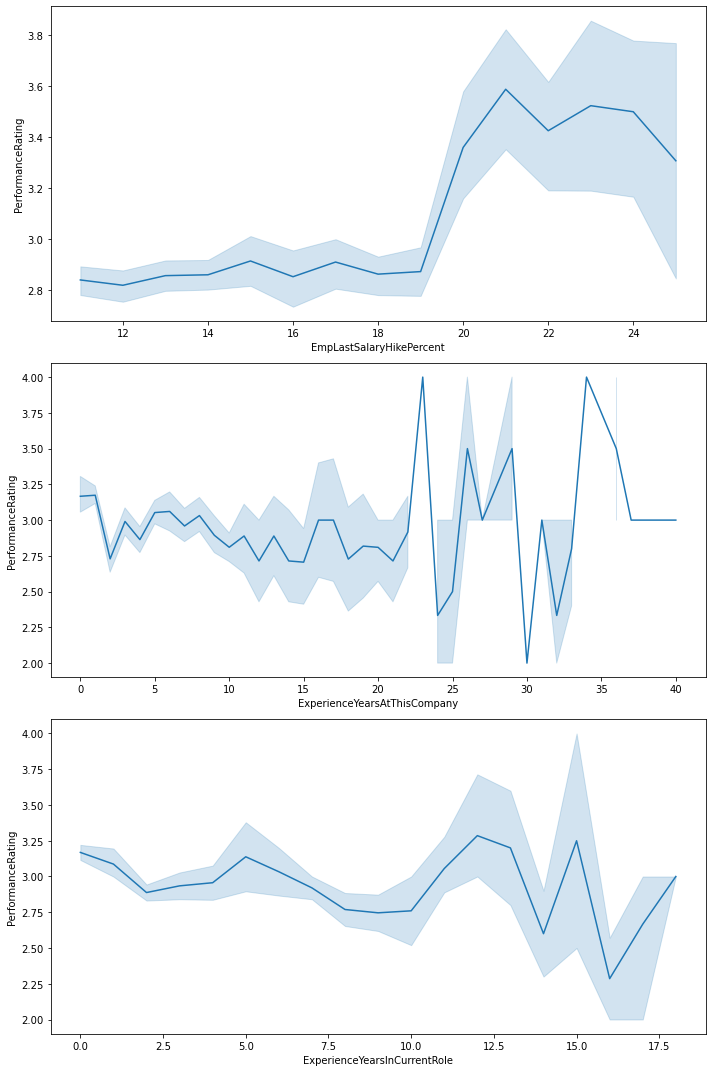

In [24]:
num_columns = df[[ 'EmpLastSalaryHikePercent','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole']]

plt.figure(figsize = (10,15), facecolor = 'white')
plotnumber = 1

for column in num_columns:
    if plotnumber <= 9:
        ax = plt.subplot(3,1, plotnumber)
        sns.lineplot(x = column, y=df['PerformanceRating'], data = num_columns)
        plt.xlabel(column, fontsize=10)
    plotnumber += 1
plt.tight_layout()
plt.show()

### Observations:

###### 1.Relation between Employee salary hike percent and Performance rating
* Employee whose salary hike percentage is between 11 to 19, have low performance rating.
* When Employees salary hike percentage increases from 19 that time performance of the employee is also increases(means employee whose salary hike is higher, that employee's performance rating is also high)

###### 2, Relation between Experience Year at this Company and Performance Rating
* Employees whose experience in current company is in between 0 to 21 years, have kind of constant performance rating.
* But when the employees experience in current company is in between 21 to 36 years, that time some employees have high performance rating and some employees have low performance rating.

##### 3.Relation between Experience Year in Current Role and Performance Rating
* We can see that, when employees experience in current role is increases, that time employees performance rating is slightly decreases.

###### Relation between Employee Environment Satisfaction and Performance Rating using boxplot

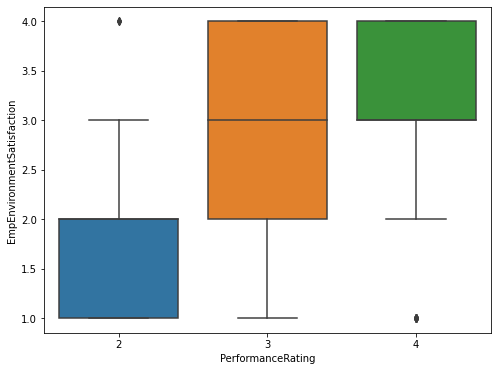

In [25]:
plt.figure(figsize = (8,6))
sns.boxplot(x=df['PerformanceRating'], y =df['EmpEnvironmentSatisfaction'])
plt.show()

* We can clearly see that employees who are more satisfy with environment have high performance rating

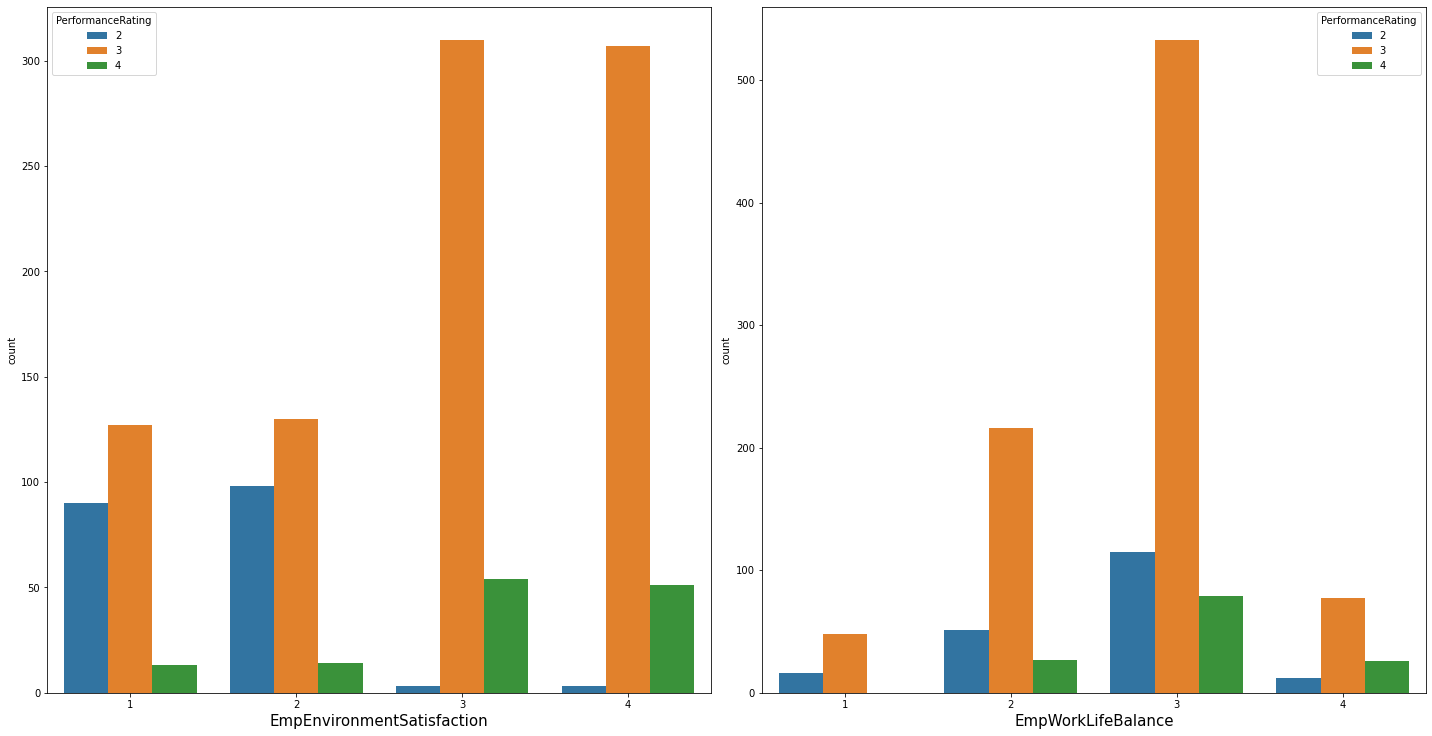

In [26]:
numerical_col = df[['EmpEnvironmentSatisfaction','EmpWorkLifeBalance']]

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 4:
        ax = plt.subplot(2,2, plotnumber)
        sns.countplot(x = df[column], hue=df['PerformanceRating'])
        plt.xlabel(column, fontsize=15)
    plotnumber += 1
plt.tight_layout()
plt.show()

### Observations:

###### 1. Relation between Employee Environment Satisfaction and  Performance Rating
* Employees with 3 & 4 environment satisfaction (means employees who are satisfy with the environment) have more performance rating then employees who are not satisfy with the environment.
* Most of the Employees with 3 & 4 environment satisfaction have 3 performace rating, also they have 4 performance rating.
* very few employees with 3 & 4 environment satisfaction have 2 performance rating(which means this employees dont have low performance rating, mostly they have high performance rating)
* Most Employees with 1 & 2 environment satisfaction have 3 performance rating but also most of them have 2 performance rating(means they have low performance rating)

###### 2. Relation between Employee Work Life Balance and Performance Rating
* Those employees whose work life balance score is high, there performance rating is more then employee whose work life balance is low.
* Most employees whose work life balance score is 3, have 3 performance rating.
* Employees whose work life balacne score is 1 , dont get performance rating of 4.

# Multivariate Analysis


### Correlation Heatmap plot of whole dataset

In [27]:
df.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

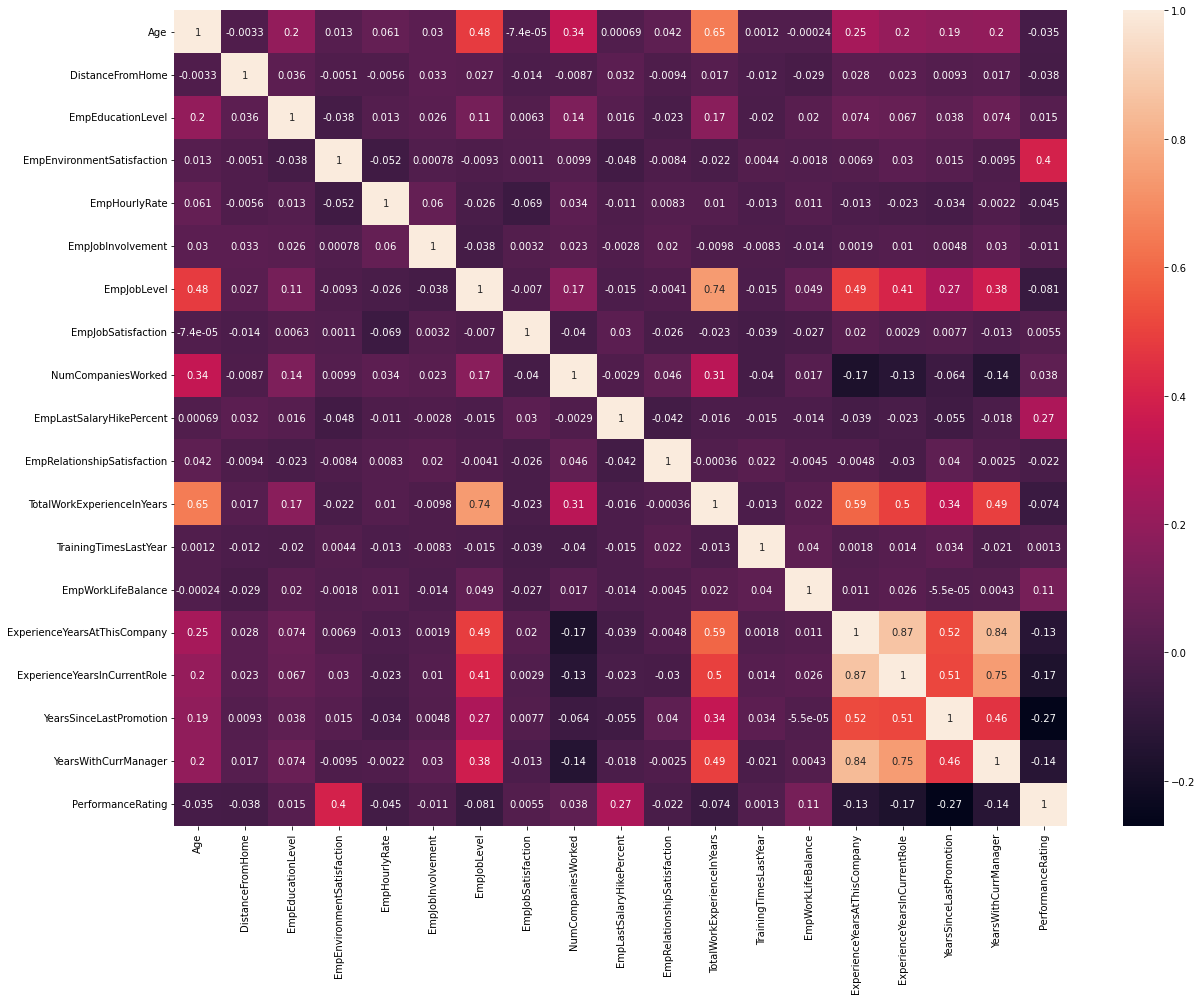

In [28]:
plt.figure(figsize=(20,15 ))
sns.heatmap(df.corr('spearman'), annot = True)
plt.show()

## Observations:
* Age has a 0.48 correlation with Employee level and 0.65 correlation with Total work expeience.
* Employees job level has a positive correlation of 0.74 with total work experience.
* Experience years at this company, Experience years in current role, Years with current manager this all features are positively correlated with each other.
* Performance rating is more correlated with Employee environment satisfaction as well as with employee last salary hike.

## Conclusion:
* There are Three features which are positively correlated and important features that effecting the target variable(Performance Rating), like Employee Environment Satisfaction,Employee Last Salary Hike Percent and Employee Work Life Balance.

## Department Wise Performance Analysis

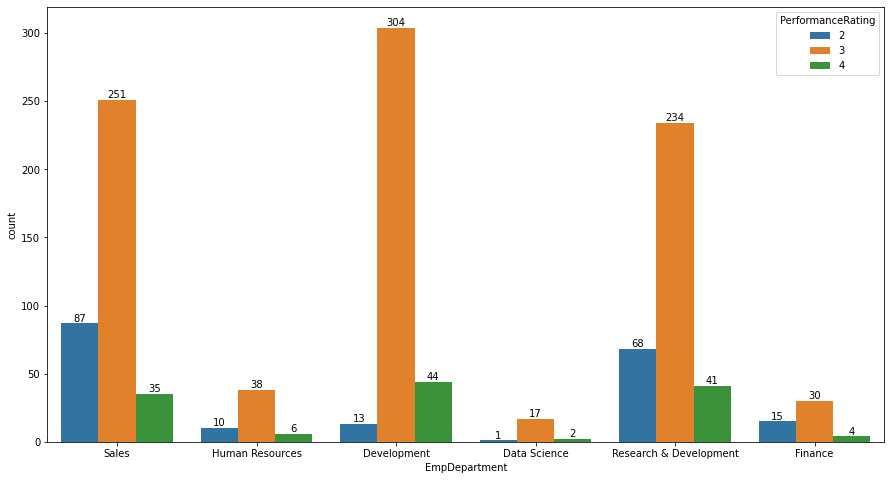

In [29]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df['EmpDepartment'],hue=df['PerformanceRating'])
for container in ax.containers:
    ax.bar_label(container)

In [30]:
df.groupby(by='EmpDepartment')['PerformanceRating'].mean()  # avearage performance rating by Emp Department

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

<AxesSubplot:xlabel='EmpDepartment'>

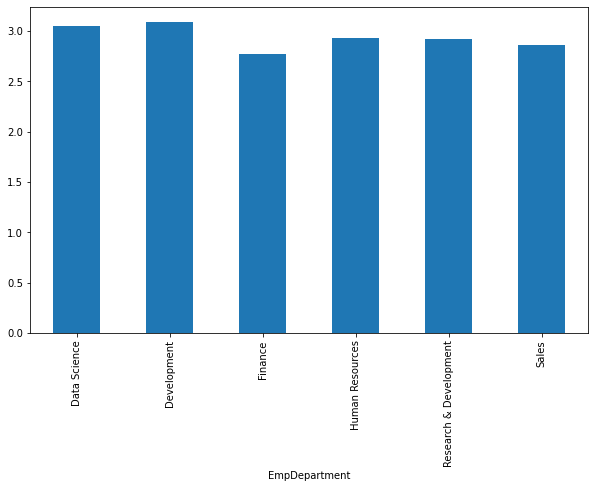

In [31]:
plt.figure(figsize=(10,6))
df.groupby(by='EmpDepartment')['PerformanceRating'].mean().plot(kind='bar')

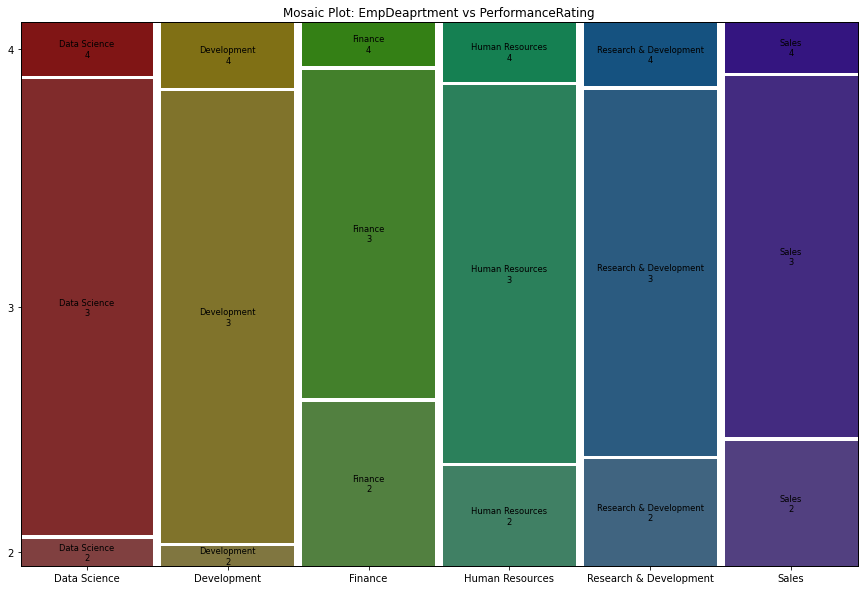

In [32]:
# A mosaic plot is a graphical representation of data from two or more qualitative variables.
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic  # The plot is a graphical representation of a contingency table.
import matplotlib.pyplot as plt

# Create a mosaic plot
mosaic_data = df[['EmpDepartment', 'PerformanceRating']].value_counts().unstack()
mosaic_data = mosaic_data.div(mosaic_data.sum(axis=1), axis=0)  # Normalize to show proportions

# Plotting
plt.rcParams["figure.figsize"]=(15,10)
mosaic(mosaic_data.stack(), title=f'Mosaic Plot: EmpDeaprtment vs PerformanceRating', gap=0.01)
plt.show()

### Observation
* Most of the employees of all Department have 3 performance rating.

**Data Science:** Employees of Data science department have second highest average performance rating. Data science is the only department where very few(which is 1) employee get 2 performance rating. The overall performance is higher compared to all departments.

**Development:** Development department employees have highest average performance rating compare to other departments. The maximum employees of development department have 3 performance rating. 

**Finance:** Here we can clearly see that employees of finance department have more 2 performance rating compare to others. Already there are less employees in Finance department and their performance is also less, that's why there performance rating is less then other deparments. 

**Human Resources:** The majority of the employees have 3 performance rating. Human resources employees are also have good average performance rating of 2.92.

**Research & Development:** Employees of R&D dpeartment have moderate performance rating, like they have high performance rating and also they have slightly more low(means 2) performance rating.

**Sales:** Most employees of sales department get 3 performance rating, also 87 employees get 2 performance rating which is second last low performance after Finance.

# Data Pre-Processing

###  Cheking missing values

In [33]:
df.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

* There is no missing value in the dataset

## Checking and Handling Outliers

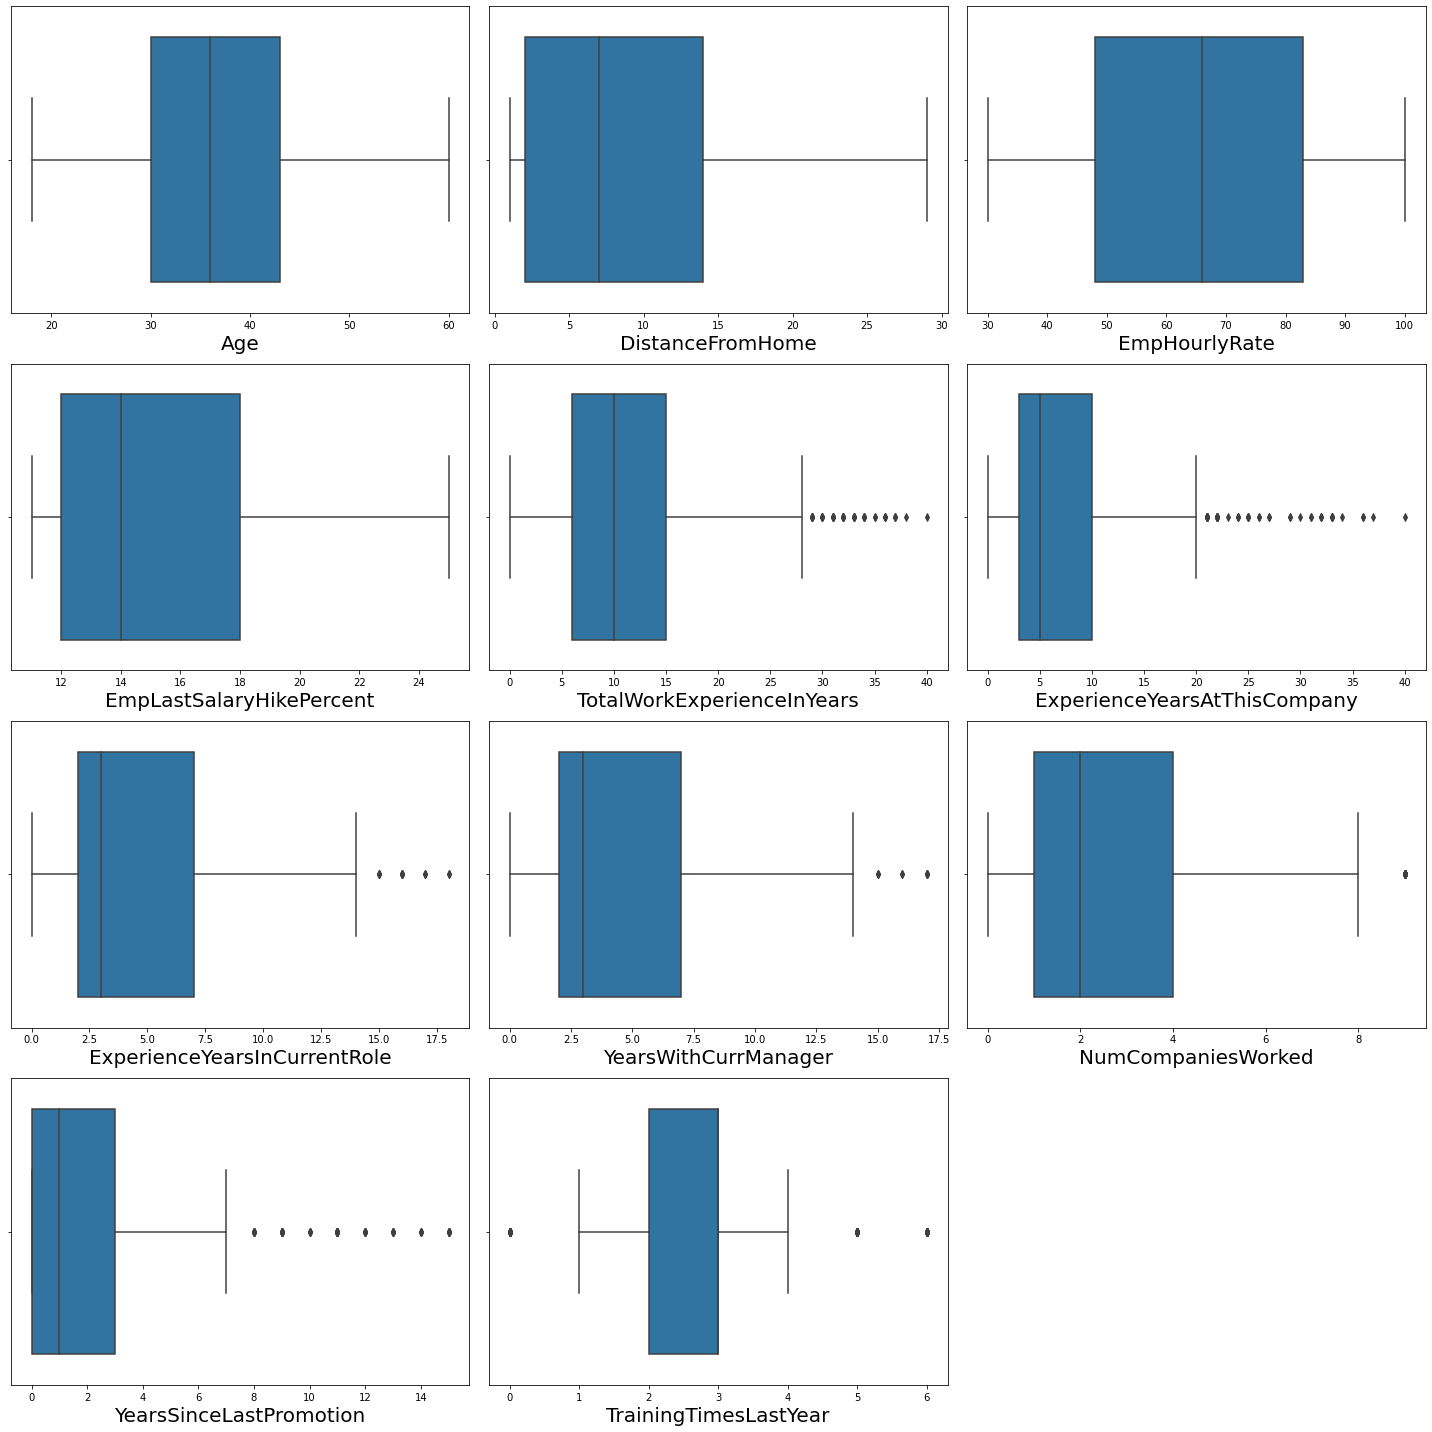

In [34]:
columns = df[[ 'Age','DistanceFromHome','EmpHourlyRate', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 
              'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 'YearsWithCurrManager','NumCompaniesWorked',
             'YearsSinceLastPromotion', 'TrainingTimesLastYear']]

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in columns:
    if plotnumber <= 12:
        ax = plt.subplot(4,3, plotnumber)
        sns.boxplot(x = df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

#### Observation:
* There are some outliers in the data, so we us IQR to replace this values with correct value.

**IQR:**
* IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles

### Total work experience in years

In [35]:
# to find first & third quantile value
Q1 = df['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = df['TotalWorkExperienceInYears'].quantile(0.75)

IQR = Q3 - Q1
print('IQR',IQR)

# geting lower extreme and upper exterme limit
lower_extreme=Q1 - 1.5 * IQR
print('lower extreme limit', lower_extreme)
upper_extreme=Q3 + 1.5 * IQR
print('upper extreme limit', upper_extreme)

IQR 9.0
lower extreme limit -7.5
upper extreme limit 28.5


In [36]:
# Replacing outlier with median
df.loc[df['TotalWorkExperienceInYears'] > upper_extreme,'TotalWorkExperienceInYears']=df['TotalWorkExperienceInYears'].median()

In [37]:
# Checking data after imputation
df.loc[df['TotalWorkExperienceInYears'] > upper_extreme]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### Experience year at this company

In [38]:
# to find first & third quantile value
Q1 = df['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = df['ExperienceYearsAtThisCompany'].quantile(0.75)

IQR = Q3 - Q1
print('IQR',IQR)

# geting lower extreme and upper exterme limit
lower_extreme=Q1 - 1.5 * IQR
print('lower extreme limit', lower_extreme)
upper_extreme=Q3 + 1.5 * IQR
print('upper extreme limit', upper_extreme)

IQR 7.0
lower extreme limit -7.5
upper extreme limit 20.5


In [39]:
# Replacing outlier with median
df.loc[df['ExperienceYearsAtThisCompany'] > upper_extreme,'ExperienceYearsAtThisCompany']=df['ExperienceYearsAtThisCompany'].median()

In [40]:
# Checking data after imputation
df.loc[df['ExperienceYearsAtThisCompany'] > upper_extreme]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### Experience Years in Current Role

In [41]:
# to find first & third quantile value
Q1 = df['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = df['ExperienceYearsInCurrentRole'].quantile(0.75)

IQR = Q3 - Q1
print('IQR',IQR)

# geting lower extreme and upper exterme limit
lower_extreme=Q1 - 1.5 * IQR
print('lower extreme limit', lower_extreme)
upper_extreme=Q3 + 1.5 * IQR
print('upper extreme limit', upper_extreme)

IQR 5.0
lower extreme limit -5.5
upper extreme limit 14.5


In [42]:
# Replacing outlier with median
df.loc[df['ExperienceYearsInCurrentRole'] > upper_extreme,'ExperienceYearsInCurrentRole']=df['ExperienceYearsInCurrentRole'].median()

In [43]:
# Checking data after imputation
df.loc[df['ExperienceYearsInCurrentRole'] > upper_extreme]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### Years WIth Current Manager

In [44]:
# to find first & third quantile value
Q1 = df['YearsWithCurrManager'].quantile(0.25)
Q3 = df['YearsWithCurrManager'].quantile(0.75)

IQR = Q3 - Q1
print('IQR',IQR)

# geting lower extreme and upper exterme limit
lower_extreme=Q1 - 1.5 * IQR
print('lower extreme limit', lower_extreme)
upper_extreme=Q3 + 1.5 * IQR
print('upper extreme limit', upper_extreme)

IQR 5.0
lower extreme limit -5.5
upper extreme limit 14.5


In [45]:
# Replacing outlier with median
df.loc[df['YearsWithCurrManager'] > upper_extreme,'YearsWithCurrManager']=df['YearsWithCurrManager'].median()

In [46]:
# Checking data after imputation
df.loc[df['YearsWithCurrManager'] > upper_extreme]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### Year since Last Promotion

In [47]:
# to find first & third quantile value
Q1 = df['YearsSinceLastPromotion'].quantile(0.25)
Q3 = df['YearsSinceLastPromotion'].quantile(0.75)

IQR = Q3 - Q1
print('IQR',IQR)

# geting lower extreme and upper exterme limit
lower_extreme=Q1 - 1.5 * IQR
print('lower extreme limit', lower_extreme)
upper_extreme=Q3 + 1.5 * IQR
print('upper extreme limit', upper_extreme)

IQR 3.0
lower extreme limit -4.5
upper extreme limit 7.5


In [48]:
# Replacing outlier with median
df.loc[df['YearsSinceLastPromotion'] > upper_extreme,'YearsSinceLastPromotion']=df['YearsSinceLastPromotion'].median()

In [49]:
# Checking data after imputation
df.loc[df['YearsSinceLastPromotion'] > upper_extreme]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### Training Times Last Year

In [50]:
# to find first & third quantile value
Q1 = df['TrainingTimesLastYear'].quantile(0.25)
Q3 = df['TrainingTimesLastYear'].quantile(0.75)

IQR = Q3 - Q1
print('IQR',IQR)

# geting lower extreme and upper exterme limit
lower_extreme=Q1 - 1.5 * IQR
print('lower extreme limit', lower_extreme)
upper_extreme=Q3 + 1.5 * IQR
print('upper extreme limit', upper_extreme)

IQR 1.0
lower extreme limit 0.5
upper extreme limit 4.5


In [51]:
# Replacing outlier with median
df.loc[df['TrainingTimesLastYear'] < lower_extreme,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()
df.loc[df['TrainingTimesLastYear'] > upper_extreme,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()

In [52]:
# Checking data after imputation
df.loc[df['TrainingTimesLastYear'] < lower_extreme]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [53]:
df.loc[df['TrainingTimesLastYear'] > upper_extreme]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### checking outliers after replacing

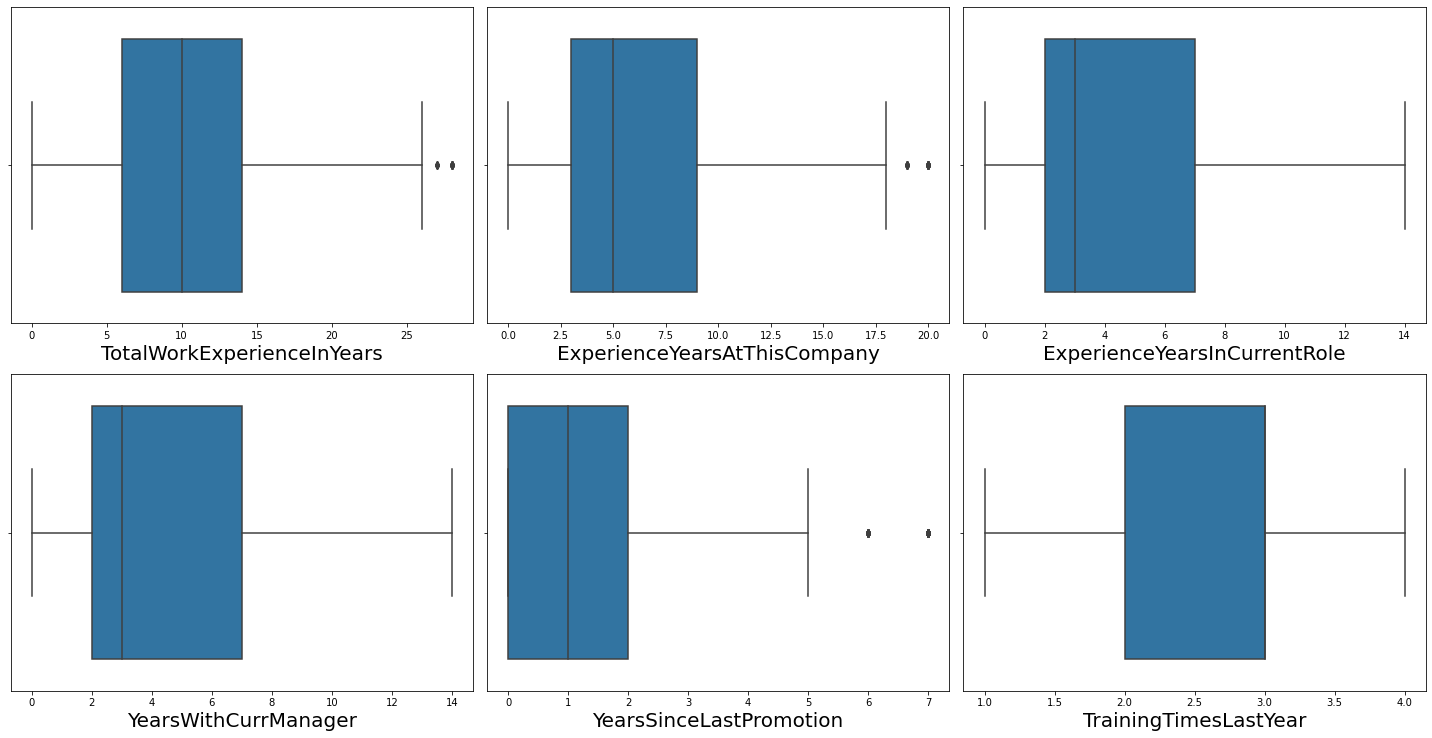

In [54]:
columns = df[[ 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 
              'YearsWithCurrManager', 'YearsSinceLastPromotion', 'TrainingTimesLastYear']]

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in columns:
    if plotnumber <= 12:
        ax = plt.subplot(4,3, plotnumber)
        sns.boxplot(x = df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

**Observation:**
* Outlier impute sucessfully, but some feature box plot showing outlier, so we can not impute this outlier.

* YearsSinceLastPromotion is highly skewed, so we do transformation on it

## Feature Transformation
* there are some left skewed features in data, so we are going to use log transformation. to make skewed data like a normal data

* we use Q-Q plot, Q–Q plot is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.

### Years since Last Promotion

In [56]:
from scipy import stats
import pylab

# define a function to plot a Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

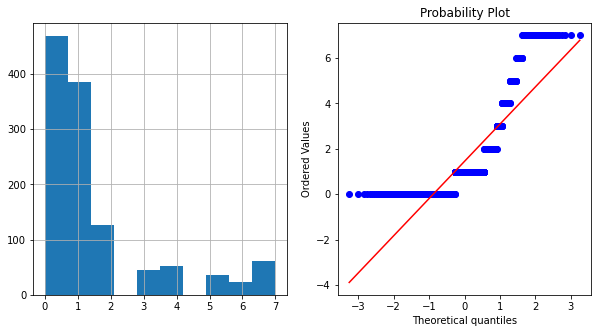

In [57]:
plot_data(df, 'YearsSinceLastPromotion')  # before log transformation

In [58]:
df['log_YearsSinceLastPromotion'] = np.log1p(df['YearsSinceLastPromotion'])

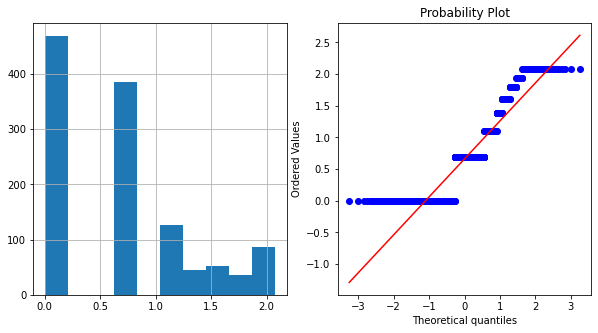

In [59]:
plot_data(df, 'log_YearsSinceLastPromotion')  # after applying lag transformation

### Observation
* After applying log transformation, points are come close to the line

# Encoding
* manual encoding = Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

### Converting Categorical to Numerical

In [60]:
df.select_dtypes('object').columns   # getting categorical column

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')

#### 1.Gender

In [61]:
df['Gender'].value_counts()  # before encoding

Male      725
Female    475
Name: Gender, dtype: int64

In [62]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [63]:
df['Gender'].value_counts()     # after encoding

1    725
0    475
Name: Gender, dtype: int64

#### 2.Education Background

In [64]:
df['EducationBackground'].value_counts().to_dict()

{'Life Sciences': 492,
 'Medical': 384,
 'Marketing': 137,
 'Technical Degree': 100,
 'Other': 66,
 'Human Resources': 21}

In [65]:
df['EducationBackground'] = df['EducationBackground'].map({'Life Sciences': 5,'Medical': 4, 'Marketing':3 ,
                                'Technical Degree': 2, 'Other': 1, 'Human Resources': 0})

In [66]:
df['EducationBackground'].value_counts()

5    492
4    384
3    137
2    100
1     66
0     21
Name: EducationBackground, dtype: int64

#### 3 Marital Status

In [67]:
df['MaritalStatus'].value_counts().to_dict()

{'Married': 548, 'Single': 384, 'Divorced': 268}

In [68]:
df['MaritalStatus'] = df['MaritalStatus'].map({'Married': 2, 'Single': 1, 'Divorced': 0})

In [69]:
df['MaritalStatus'].value_counts()

2    548
1    384
0    268
Name: MaritalStatus, dtype: int64

#### 4. Employee Department

In [70]:
df['EmpDepartment'].value_counts().to_dict()

{'Sales': 373,
 'Development': 361,
 'Research & Development': 343,
 'Human Resources': 54,
 'Finance': 49,
 'Data Science': 20}

In [71]:
df['EmpDepartment'] = df['EmpDepartment'].map({'Sales': 5,
 'Development': 4,
 'Research & Development': 3,
 'Human Resources': 2,
 'Finance': 1,
 'Data Science': 0})

In [72]:
df['EmpDepartment'].value_counts()

5    373
4    361
3    343
2     54
1     49
0     20
Name: EmpDepartment, dtype: int64

#### 5.Employee job role

In [73]:
df['EmpJobRole'].value_counts().to_dict()

{'Sales Executive': 270,
 'Developer': 236,
 'Manager R&D': 94,
 'Research Scientist': 77,
 'Sales Representative': 69,
 'Laboratory Technician': 64,
 'Senior Developer': 52,
 'Manager': 51,
 'Finance Manager': 49,
 'Human Resources': 45,
 'Technical Lead': 38,
 'Manufacturing Director': 33,
 'Healthcare Representative': 33,
 'Data Scientist': 20,
 'Research Director': 19,
 'Business Analyst': 16,
 'Senior Manager R&D': 15,
 'Delivery Manager': 12,
 'Technical Architect': 7}

In [74]:
df['EmpJobRole'] = df['EmpJobRole'].map({'Sales Executive': 18,'Developer': 17,'Manager R&D': 16,'Research Scientist': 15,
 'Sales Representative': 14,'Laboratory Technician': 13, 'Senior Developer': 12, 'Manager': 11, 'Finance Manager': 10,
 'Human Resources': 9, 'Technical Lead': 8, 'Manufacturing Director': 7, 'Healthcare Representative': 6,
 'Data Scientist': 5, 'Research Director': 4, 'Business Analyst': 3, 'Senior Manager R&D': 2,
 'Delivery Manager': 1,'Technical Architect': 0})

In [75]:
df['EmpJobRole'].value_counts()

18    270
17    236
16     94
15     77
14     69
13     64
12     52
11     51
10     49
9      45
8      38
7      33
6      33
5      20
4      19
3      16
2      15
1      12
0       7
Name: EmpJobRole, dtype: int64

#### 6. Business Travel Frequency

In [76]:
df['BusinessTravelFrequency'].value_counts().to_dict()

{'Travel_Rarely': 846, 'Travel_Frequently': 222, 'Non-Travel': 132}

In [77]:
df['BusinessTravelFrequency'] = df['BusinessTravelFrequency'].map({'Travel_Rarely': 2, 'Travel_Frequently': 1, 
                                                                   'Non-Travel': 0})

In [78]:
df['BusinessTravelFrequency'].value_counts()

2    846
1    222
0    132
Name: BusinessTravelFrequency, dtype: int64

#### 7. Overtime

In [79]:
df['OverTime'].value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [80]:
df['OverTime'] = df['OverTime'].map({'No' : 1, 'Yes' : 0})

In [81]:
df['OverTime'].value_counts()

1    847
0    353
Name: OverTime, dtype: int64

#### 8.Attrition

In [82]:
df['Attrition'].value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [83]:
df['Attrition'] = df['Attrition'].map({'No' : 1, 'Yes' : 0})

In [84]:
df['Attrition'].value_counts()

1    1022
0     178
Name: Attrition, dtype: int64

In [85]:
# checking all features enoding
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,log_YearsSinceLastPromotion
0,32,1,3,1,5,18,2,10,3,4,55,3,2,4,1,1,12,4,10,2,2,10,7,0,8,1,3,0.000000
1,47,1,3,1,5,18,2,14,4,4,42,3,2,1,2,1,12,4,20,2,3,7,7,1,7,1,3,0.693147
2,40,1,5,2,5,18,1,5,4,4,48,2,3,1,5,0,21,3,20,2,3,18,13,1,12,1,4,0.693147
3,41,1,0,0,2,11,2,10,4,2,73,2,5,4,3,1,15,2,23,2,2,5,6,1,6,1,3,0.693147
4,60,1,3,1,5,18,2,16,4,1,84,3,2,1,8,1,14,4,10,1,3,2,2,2,2,1,3,1.098612


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1200 non-null   int64  
 1   Gender                        1200 non-null   int64  
 2   EducationBackground           1200 non-null   int64  
 3   MaritalStatus                 1200 non-null   int64  
 4   EmpDepartment                 1200 non-null   int64  
 5   EmpJobRole                    1200 non-null   int64  
 6   BusinessTravelFrequency       1200 non-null   int64  
 7   DistanceFromHome              1200 non-null   int64  
 8   EmpEducationLevel             1200 non-null   int64  
 9   EmpEnvironmentSatisfaction    1200 non-null   int64  
 10  EmpHourlyRate                 1200 non-null   int64  
 11  EmpJobInvolvement             1200 non-null   int64  
 12  EmpJobLevel                   1200 non-null   int64  
 13  Emp

* all fetures are becomes numerical

# Feature Scaling
**Standard Scaling:**
Standardization is the process of scaling the feature, it assumes the feature follow  normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1.

In [87]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'log_YearsSinceLastPromotion']]=scalar.fit_transform(df[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','log_YearsSinceLastPromotion']])

In [88]:
df.head() # checking scaling is done or not

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,log_YearsSinceLastPromotion
0,-0.541458,1,3,1,5,18,2,0.102061,3,4,-0.543569,3,2,4,1,1,-0.889111,4,-0.058535,-0.879579,2,0.868276,0.864098,0,1.202103,1,3,-1.012816
1,1.109888,1,3,1,5,18,2,0.591464,4,4,-1.187042,3,2,1,2,1,-0.889111,4,1.512870,-0.879579,3,0.200371,0.864098,1,0.902825,1,3,0.050319
2,0.339260,1,5,2,5,18,1,-0.509693,4,4,-0.890055,2,3,1,5,0,1.594054,3,1.512870,-0.879579,3,2.649355,2.661702,1,2.399219,1,4,0.050319
3,0.449349,1,0,0,2,11,2,0.102061,4,2,0.347393,2,5,4,3,1,-0.061389,2,1.984292,-0.879579,2,-0.244898,0.564498,1,0.603546,1,3,0.050319
4,2.541054,1,3,1,5,18,2,0.836165,4,1,0.891870,3,2,1,8,1,-0.337297,4,-0.058535,-2.303999,3,-0.912803,-0.633905,2,-0.593570,1,3,0.672213


# Feature Selection
* Finding out the best feature which will contribute and have good relationships with the target variable.

#### Droping constatnt feature.

In [89]:
# droping Years Since Last Promotion because we create a new feaure using log transformation
df.drop(columns=['YearsSinceLastPromotion'], inplace = True)

In [90]:
df.head(3)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,PerformanceRating,log_YearsSinceLastPromotion
0,-0.541458,1,3,1,5,18,2,0.102061,3,4,-0.543569,3,2,4,1,1,-0.889111,4,-0.058535,-0.879579,2,0.868276,0.864098,1.202103,1,3,-1.012816
1,1.109888,1,3,1,5,18,2,0.591464,4,4,-1.187042,3,2,1,2,1,-0.889111,4,1.512870,-0.879579,3,0.200371,0.864098,0.902825,1,3,0.050319
2,0.339260,1,5,2,5,18,1,-0.509693,4,4,-0.890055,2,3,1,5,0,1.594054,3,1.512870,-0.879579,3,2.649355,2.661702,2.399219,1,4,0.050319


## Correlation

<AxesSubplot:>

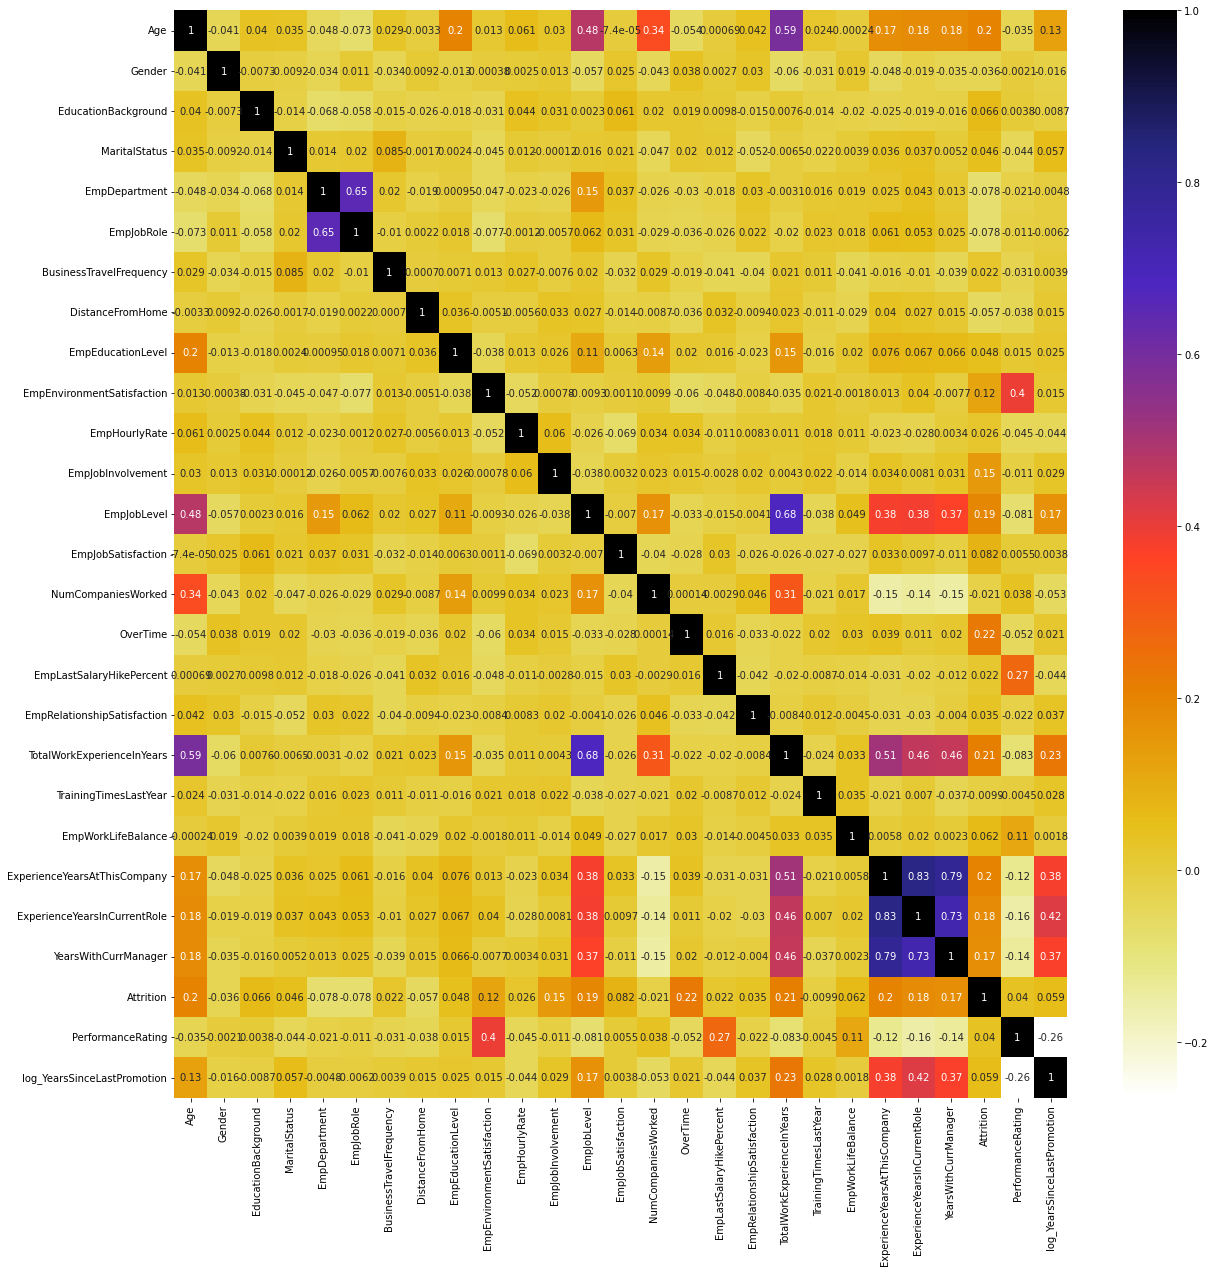

In [91]:
# Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr('spearman'),annot = True, cmap=plt.cm.CMRmap_r)

## Observations:
-     There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1. 

-     Top 3 factors which affect the employee performance are 1. Employee EnvironmentSatisfaction, 2. Employee Last Salary Hike Percent and 3. Years Since Last Promotion

In [92]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(df,0.9)

set()

### Observaion:
* There is not any highly corelated input feature.

#### PCA was used, it resulted in decline of accuracy.
    from sklearn.decomposition import PCA
    pca=PCA(n_components=None)
    new_df=pca.fit_transform(df)
    pca.explained_variance_ratio_

### Saving the Pre-Processed data

In [135]:
# Here we have selected only the important columns

new_df = df[['EmpDepartment', 'EmpJobRole', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'log_YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']] # Taking only variables with correlation coeffecient greater than 0.1
new_df.head()

,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,log_YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,5,18,4,-0.889111,2,0.868276,0.864098,-1.012816,1.202103,3
1,5,18,4,-0.889111,3,0.200371,0.864098,0.050319,0.902825,3
2,5,18,4,1.594054,3,2.649355,2.661702,0.050319,2.399219,4
3,2,11,2,-0.061389,2,-0.244898,0.564498,0.050319,0.603546,3
4,5,18,1,-0.337297,3,-0.912803,-0.633905,0.672213,-0.593570,3


In [136]:
new_df.to_csv('employee_performance_analysis_preprocessed_data.csv')

# Reading new preprocess csv file
data = pd.read_csv('employee_performance_analysis_preprocessed_data.csv')

# Get first five rows 
data.head()

,Unnamed: 0,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,log_YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,0,5,18,4,-0.889111,2,0.868276,0.864098,-1.012816,1.202103,3
1,1,5,18,4,-0.889111,3,0.200371,0.864098,0.050319,0.902825,3
2,2,5,18,4,1.594054,3,2.649355,2.661702,0.050319,2.399219,4
3,3,2,11,2,-0.061389,2,-0.244898,0.564498,0.050319,0.603546,3
4,4,5,18,1,-0.337297,3,-0.912803,-0.633905,0.672213,-0.593570,3
